In [ ]:
# Forcing autoreload of modules so restart is not required
%load_ext autoreload
%autoreload 2

import os

os.chdir("../../")


print("Current Working Directory:  ", os.getcwd())

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

In [3]:
X_train = pd.read_csv('./data/processed/NSL_KDD/binary/X_train.csv',low_memory=False)
Y_train = pd.read_csv('./data/processed/NSL_KDD/binary/Y_train.csv',low_memory=False)


X_test = pd.read_csv('./data/processed/NSL_KDD/binary/X_test.csv',low_memory=False)
Y_test = pd.read_csv('./data/processed/NSL_KDD/binary/Y_test.csv',low_memory=False)

In [ ]:
Y_train = Y_train.values.ravel()
Y_test = Y_test.values.ravel()

In [5]:
dt_model = DecisionTreeClassifier(random_state=42)

In [6]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
Y_pred_dt = dt_model.predict(X_test)

In [8]:
accuracy = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(classification_report(Y_test, Y_pred_dt))

Decision Tree Accuracy: 0.9219
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      6620
           1       0.88      0.92      0.90      3954

    accuracy                           0.92     10574
   macro avg       0.91      0.92      0.92     10574
weighted avg       0.92      0.92      0.92     10574



In [9]:
print(confusion_matrix(Y_test, Y_pred_dt))

[[6118  502]
 [ 324 3630]]


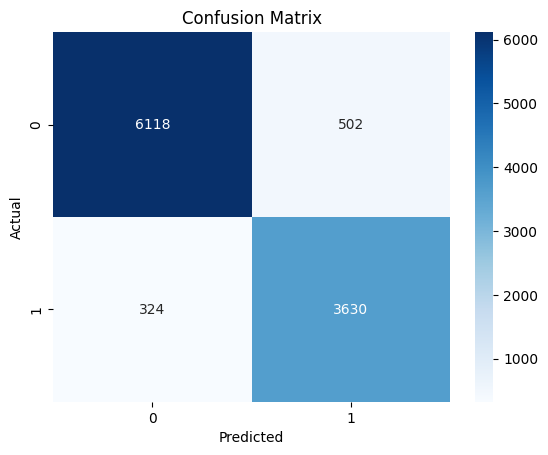

In [10]:
cm = confusion_matrix(Y_test, Y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
